# Statistics Using SAS

In [27]:
%let path=/folders/myfolders/ECST131;
libname statdata "&path";

/*Go to the bottom to input the dataset*/

## Basic Statistical Concepts

A population is the complete set of observations or the entire group of objects that you are researching. A sample is a subset of the population. The sample should be representative of the population. You can obtain a representative sample by collecting a simple random sample.

Parameters are numerical values that summarize characteristics of a population. Parameter values are typically unknown and are represented by Greek letters. Statistics summarize characteristics of a sample. You use letters from the English alphabet to represent sample statistics. You can measure characteristics of your sample and provide numerical values that summarize those characteristics.

Variables are classified according to their characteristics. They can be quantitative or categorical. Data that consists of counts or measurements is quantitative. Quantitative data can be further distinguished by two types: discrete and continuous. Discrete data takes on only a finite, or countable, number of values. Continuous data has an infinite number of values and no breaks or jumps.

Categorical or attribute data consists of variables that denote groupings or labels. There are two main types: nominal and ordinal. A nominal categorical variable exhibits no ordering within its groups or categories. With ordinal categorical variables, the observed levels of the variable can be ordered in a meaningful way that implies differences due to magnitude.

There are two scales of measurement for categorical variables: nominal and ordinal. There are two scales of measurement for continuous variables: interval and ratio. Data from an interval scale can be rank-ordered and has a sensible spacing of observations such that differences between measurements are meaningful. However, interval scales lack the ability to calculate ratios between numbers on the scale because there is no true zero point. Data on a ratio scale includes a true zero point and can therefore accurately indicate the ratio of difference between two spaces on the measurement scale.

The appropriate statistical method for your data also depends on the number of variables involved. Univariate analysis provides techniques for analyzing and describing a single variable at a time. Bivariate analysis describes and explains the relationship between two variables and how they change, or covary, together. Multivariate analysis examines two or more variables at the same time, in order to understand the relationships among them.

    PROC MEANS DATA=SAS-data-set <options>;       
    CLASS variables;
    VAR variables;
    RUN;

Option | Description
---- | ---- 
N | Number of nonmissing observations
NMISS | Number of observations with missing values
MEAN | Arithmetic mean
STD | Standard deviation
STDERR | Standard error
MIN | Minimum value
MAX | Maximum value
MEDIAN | Median
MAXDEC= | Maximum number of decimal places to display
CLM | 95% confidence limit on the mean
CV | Coefficient of variation

    PROC UNIVARIATE DATA=SAS-data-set <options>;      
        VAR variables;
        ID variables;
        HISTOGRAM variables </options>;
        PROBPPLOT variables </options>;
        INSET keywords </options>;
    RUN;
 
    PROC SGPLOT DATA=SAS-data-set<options>;
        DOT category-variable </option(s)>;
        HBAR category-variable </option(s)>;
        VBAR category-variable </option(s)>;
        HBOX response-variable </option(s)>;
        VBOX response-variable </option(s)>;
        HISTOGRAM response-variable </option(s)>;
        SCATTER X=variable Y=variable </option(s)>;
        NEEDLE X=variable Y=numeric-variable </option(s)>;
        REG X=numeric-variable Y=numeric-variable </option(s)>;
        REFLINE variable | value-1 <... value-n> </option(s)>;
    RUN;
    
    ODS GRAPHICS ON <options>;
        statistical procedure code
    ODS GRAPHICS OFF;

### Sample Programs

In [28]:
proc print data=statdata.testscores;
run;

Obs,Gender,SATScore,IDNumber
1,Male,1170,61469897
2,Female,1090,33081197
3,Male,1240,68137597
4,Female,1000,37070397
5,Male,1210,64608797
6,Female,970,60714297
7,Male,1020,16907997
8,Female,1490,9589297
9,Male,1200,93891897
10,Female,1260,85859397


#### Using Proc Freq 


Plot Name | Table type | Require option on TABLES statement
--- | --- | ---
AGREEPLOT | two-way | AGREE
CUMFREQPLOT | one-way |
DEVIATIONPLOT | one-way | CHISQ
FREQPLOT | any request |
KAPPAPLOT | three-way | AGREE
ODDSRATIOPLOT | hx2x2 | MEASURES or RELRISK
RELREISKPLOT | hx2x2 | MEASURES or RELRISK
RISKDIFFPLOT | hx2x2 | RISKDIFF
WTKAPPAPLOT | hxrxr (r>2) | AGREE




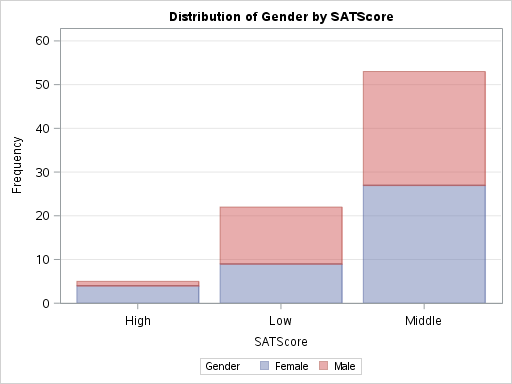

In [29]:
proc format;
value $gender 'M' = 'Male'
'F' = 'Female';
value score low-<1100 = 'Low'
            1100-<1400 = 'Middle'
            1400-High = 'High';
run;

proc freq data=statdata.testscores ORDER=FORMATTED;
    tables gender*SATScore / noprecent norow nocol CHISQ 
           plots = freqplot (twoway = stacked);
           *plots = freqplot (twoway = grouphorizontal);
    format Gender $gender. SATScore score.;
run;    

#### Using PROC MEANS 

In [30]:
proc means data=statdata.testscores maxdec=2 fw=10 printalltypes
           n mean median std sterr var q1 q3 clm t;
   class Gender;
   var SATScore;
   title 'Selected Descriptive Statistics for SAT Scores';
run;
title; 

#### Using proc sgplot, proc univariate


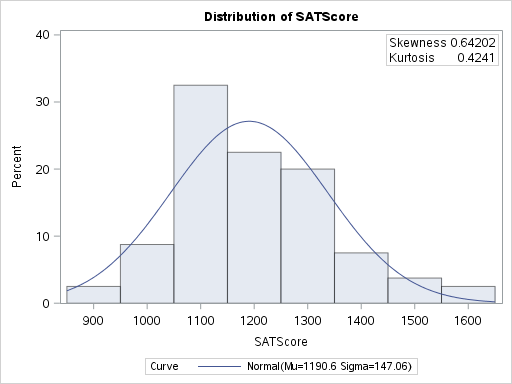
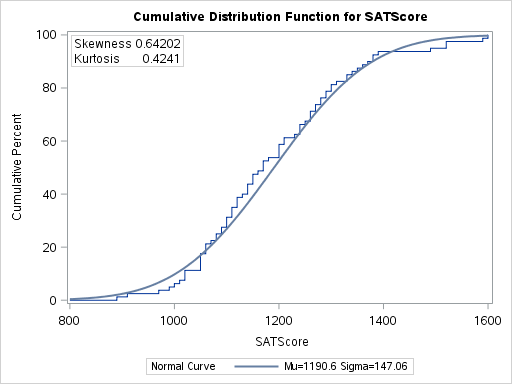
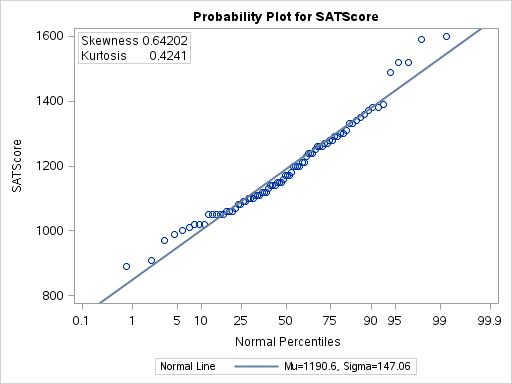

In [31]:
proc univariate data=statdata.testscores ALPHA=0.05;
   var SATScore;
   id idnumber;
   histogram SATScore / normal(mu=est sigma=est);
     inset skewness kurtosis / position=ne;
   probplot SATScore / normal(mu=est sigma=est);
     inset skewness kurtosis;
   cdfplot SATScore / normal(mu=est sigma=est);
     inset skewness kurtosis;
   title 'Descriptive Statistics Using PROC UNIVARIATE';
run;
title;


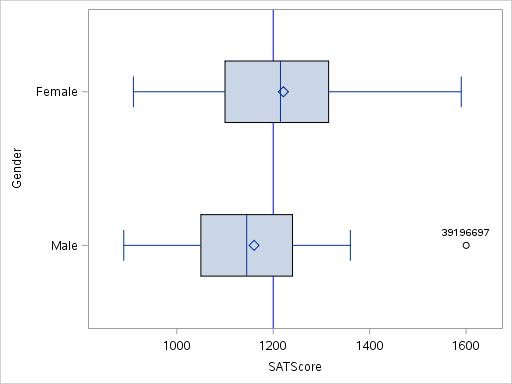

In [32]:
proc sgplot data = statdata.testscores ;
    *dot SATScore;
    *vbar SATscore;
    *scatter y=SATScore x=Gender;
    refline 1200 / axis=x lineattrs =(color=blue);
    /*hbox SATScore / group=Gender datalabel = IDNumber*/
    hbox SATScore / category=Gender datalabel = IDNumber missing;
    format IDnUMBER 8.;
run;


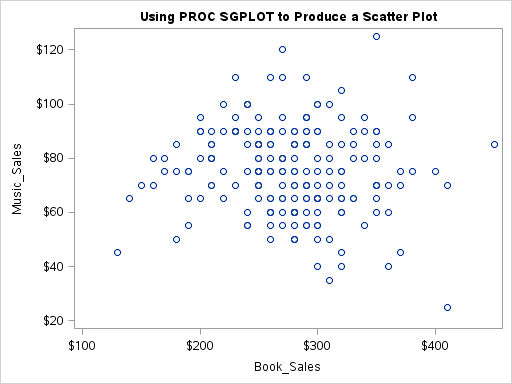

In [33]:
title "Using PROC SGPLOT to Produce a Scatter Plot";
proc sgplot data=store;
scatter x=Book_Sales y=Music_Sales;
run;
quit;


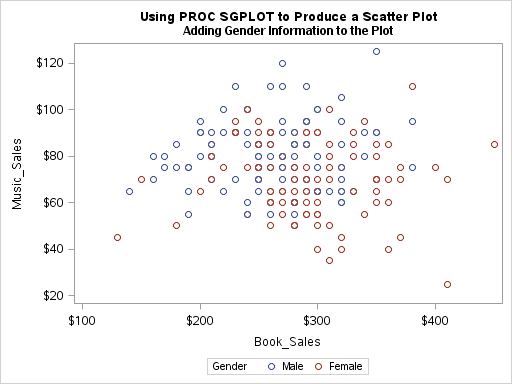

In [34]:
title "Using PROC SGPLOT to Produce a Scatter Plot";
title2 "Adding Gender Information to the Plot";
proc sgplot data=store;
scatter x=Book_Sales y=Music_Sales / group=Gender;
run;
quit;


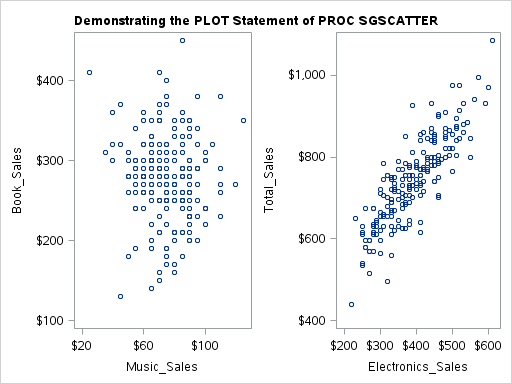

In [35]:
title "Demonstrating the PLOT Statement of PROC SGSCATTER";
proc sgscatter data=store;
plot Book_Sales * Music_Sales Total_Sales * Electronics_Sales;
run;


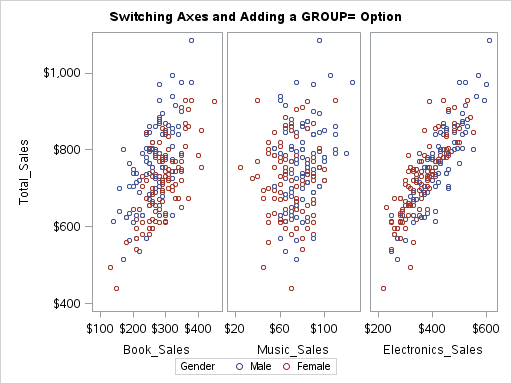

In [36]:
title "Switching Axes and Adding a GROUP= Option";
proc sgscatter data=store;
compare Y=Total_Sales
X=(Book_Sales Music_Sales Electronics_Sales) / group=Gender;
run;

The left and right sides of the box represent the 1st and 3rd quartiles (sometimes
abbreviated Q1 and Q3). The vertical bar inside the box is the median, and the diamond
represents the mean. The lines extending from the left and right side of the box (called
whiskers) represent data values that are less than 1.5 times the interquartile range from
Q1 and Q3.

The option DATALABEL= lets you select a variable to identify specific outliers. If you
use the DATALABEL option without naming a label variable, SGPLOT uses the
numerical value of the response variable (SBP in this example) to label the outliers.

### T test

    PROC TTEST DATA=SAS-data-set <options eg sides = U>;
        CLASS variables;
        VAR variables;
        PARIED variable1*variable2;
    RUN;

#### One-sample t-test


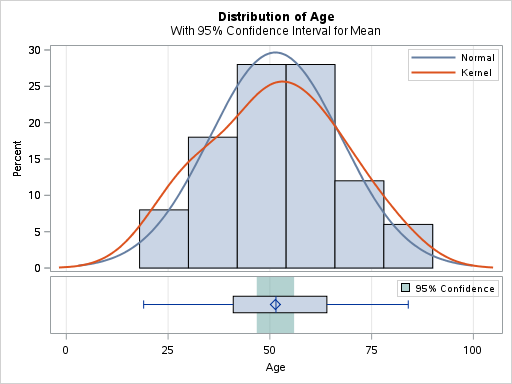
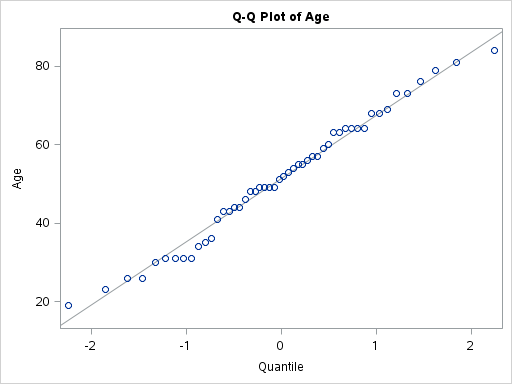

In [37]:
title "Conducting a One-Sample t-test Using PROC TTEST";
proc ttest data=exercise h0=50 sides=2 alpha=.05;
var Age;
run;


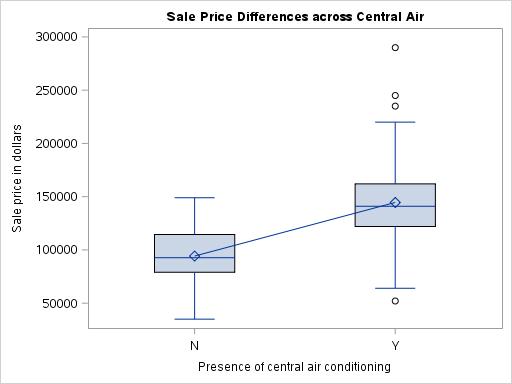
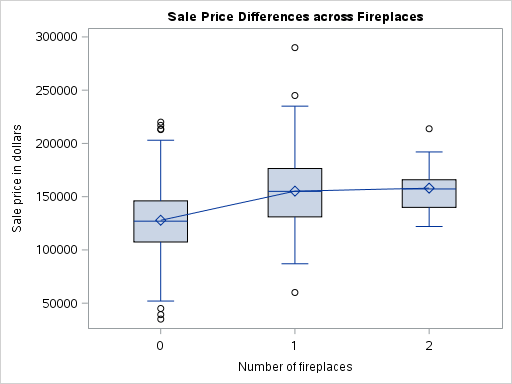
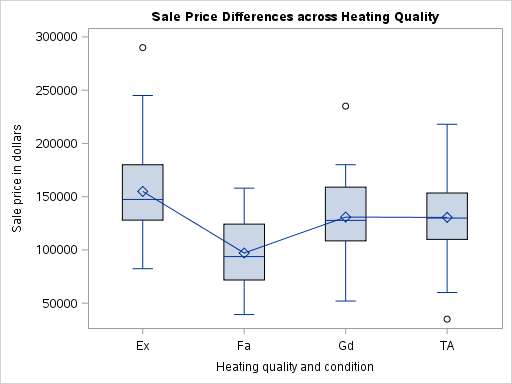

In [38]:
proc sgplot data=statdata.ameshousing3;
   vbox SalePrice / category=Central_Air
                    connect=mean;
   title "Sale Price Differences across Central Air";
run;
 
proc sgplot data=statdata.ameshousing3;
   vbox SalePrice / category=Fireplaces
                    connect=mean;
   title "Sale Price Differences across Fireplaces";
run;
 
proc sgplot data=statdata.ameshousing3;
   vbox SalePrice / category=Heating_QC
                    connect=mean;
   title "Sale Price Differences across Heating Quality";
run;

#### Two-sample t-test

The two-sample t-test is a hypothesis test for answering questions 
about the means of two populations. This test enables you to examine 
the differences between populations for one or more continuous variables. 
You can assess whether the means of the two populations are statistically 
different from each other. The null hypothesis for the two-sample t-test is 
that the means for the two groups are equal, or that $μ1 - μ2$ equals 0.

When you compare the means of two populations using a two-sample t-test, you 
make three assumptions: 
* The data contains independent observations, 
* The distributions of the two populations are normal, and 
* The variances in these normal distributions are equal.

To evaluate the assumption of equal variances in the two populations, you can 
use the F-test for equality of variances. To test the hypothesis, you calculate 
the F statistic, which is the ratio of the maximum sample variance of the two groups
to the minimum sample variance of the two groups. By construction, the F statistic 
is always greater than or equal to 1.


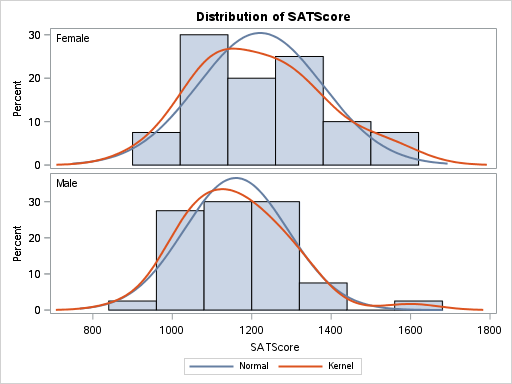
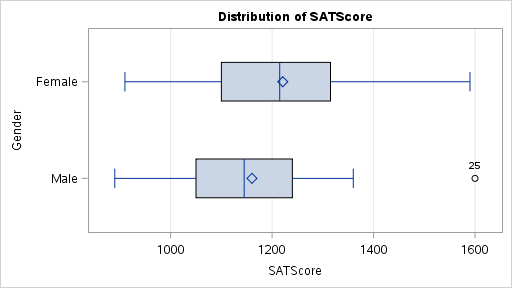
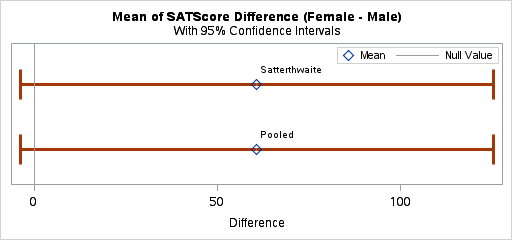
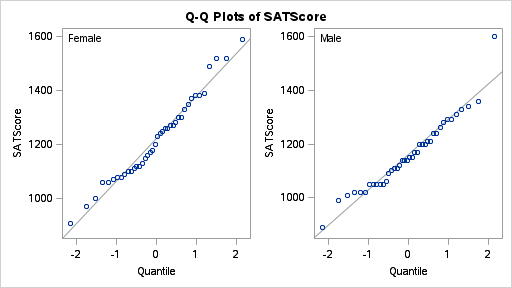

In [39]:
ods graphics on;
proc ttest data=statdata.testscores 
           /*plots(shownull)=interval;*/
           plots(unpack shownull) = all;
           /*SIDES=U;*/
           /*SIDES=L;*/
   class Gender;
   var SATScore;
   title "Two-Sample t=Test Comparing Girls to Boys";
run;
ods graphics off;

In general, Pool variance is 

$$s_{p}^{2}={\frac  {\sum _{{i=1}}^{k}(n_{i}-1)s_{i}^{2}}{\sum _{{i=1}}^{k}(n_{i}-1)}}$$

Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. Welch's t-test is an adaptation of Student's t-test,[1] that is more reliable when the two samples have unequal variances and unequal sample sizes.[2] These tests are often referred to as "unpaired" or "independent samples" t-tests, as they are typically applied when the statistical units underlying the two samples being compared are non-overlapping.

$$t\quad =\quad {\;\overline {X}_{1}-\overline {X}_{2}\; \over {\sqrt  {\;{s_{1}^{2} \over N_{1}}\;+\;{s_{2}^{2} \over N_{2}}\quad }}}\,$$

where ${\displaystyle {\overline {X}}_{1}}$, $ s_{1}^{2}$ and $ N_{1}$ are the 1st sample mean, population standard deviation and sample size, respectively. Unlike in Student's t-test, the denominator is not based on a pooled variance estimate.

The degrees of freedom ${\displaystyle \nu }$   associated with this variance estimate is approximated using the Welch–Satterthwaite equation:

$${\displaystyle \nu \quad \approx \quad {{\left(\;{s_{1}^{2} \over N_{1}}\;+\;{s_{2}^{2} \over N_{2}}\;\right)^{2}} \over {\quad {s_{1}^{4} \over N_{1}^{2}\nu _{1}}\;+\;{s_{2}^{4} \over N_{2}^{2}\nu _{2}}\quad }}} \nu \quad \approx \quad {{\left(\;{s_{1}^{2} \over N_{1}}\;+\;{s_{2}^{2} \over N_{2}}\;\right)^{2}} \over {\quad {s_{1}^{4} \over N_{1}^{2}\nu _{1}}\;+\;{s_{2}^{4} \over N_{2}^{2}\nu _{2}}\quad }}$$

Here ${\displaystyle \nu _{1}=N_{1}-1} {\displaystyle \nu _{1}=N_{1}-1}$, the degrees of freedom associated with the first variance estimate. ${\displaystyle \nu _{2}=N_{2}-1} {\displaystyle \nu _{2}=N_{2}-1}$, the degrees of freedom associated with the 2nd variance estimate.

In the above example,

$t=\frac{{\bar{X}}_{1}-{\bar{X}}_{2}}{s_{p}{\sqrt{2/n}}}$

$s_{p}={\sqrt{\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}}$

$\sqrt{\frac{((157.4^{2}+130.9^{2})}{2}} = 144.76$

Aso,

${\text{SD}}_{\bar {x}}\ ={\frac {\sigma }{\sqrt {n}}}$

For female, ${\text{SD}}_{{Female}}\ = \frac{157.4}{\sqrt{40}}$

The SHOWNULL option displays a vertical reference line at the null hypothesis value
(zero by default) on the plot of mean differences. That plot shows the value of the
difference between the sample means and the confidence interval (95% by default)
around the value. If the confidence interval includes the null hypothesis value, the
implication is that the difference is not statistically significant at your chosen alpha level
(ALPHA=0.05 by default).

The decision to choose the pooled or Satterthwaite values is somewhat controversial.
Some statisticians recommend that you look at the p-value from the test for equality of
variances to decide which t- and p-value to use. Others think that this is somewhat
circular reasoning and that you should decide ahead of time which assumption is most
reasonable.


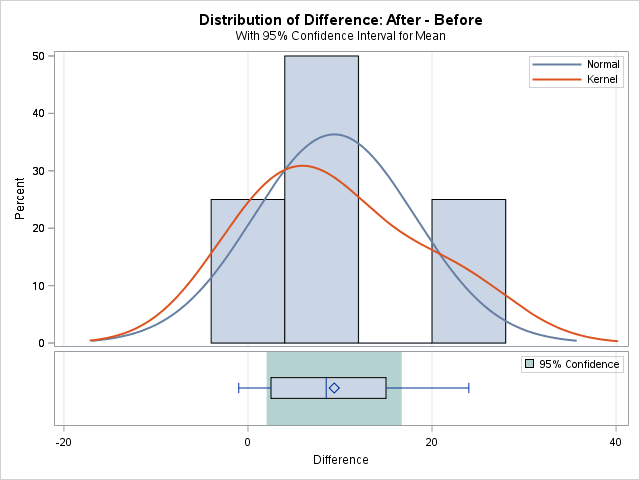
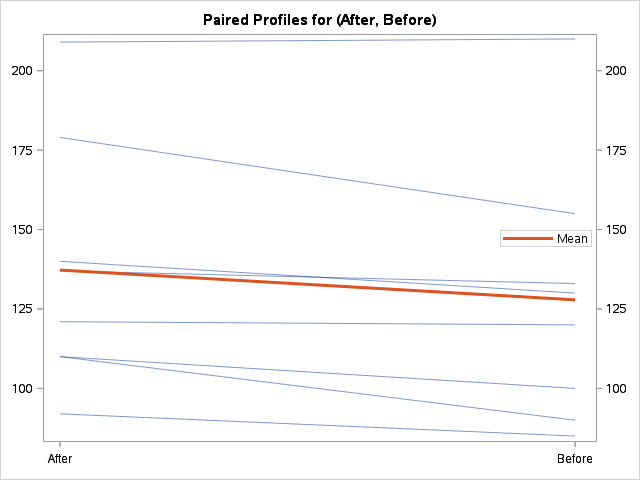
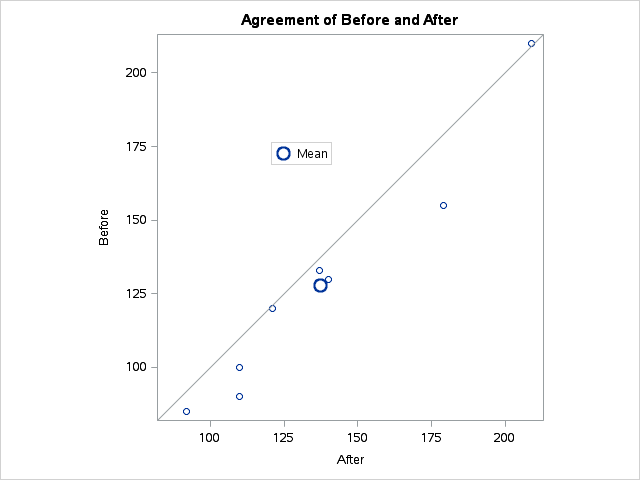
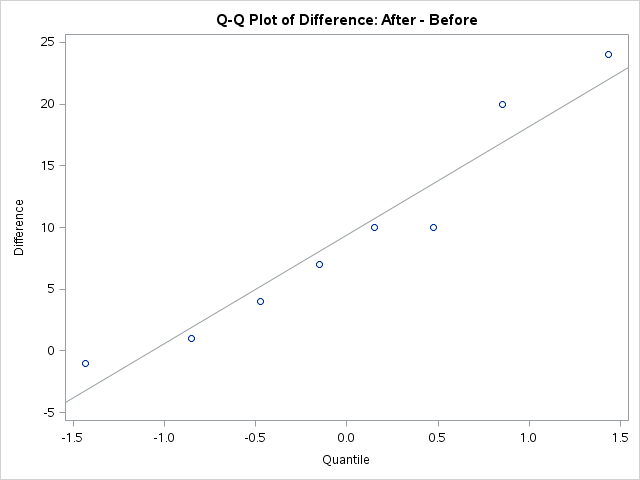

In [40]:
title "Demonstrating a Paired T-test";
proc ttest data=reading; /*By default, it prints (summaryplot agreementplot profilesplot);*/
paired After*Before;
run;

/*You see that the reading program did indeed increase reading speeds (by an average of
9.375 words per minute), with a p-value of .0194.*/

### ANOVA 

ANOVA is a type of regression where independent variables are nominal variables. Nominal variable is one that have two or more levels, but there is no intrinsic ordering for the levels. ANOVA stands for Analysis of Variance. It is used to compare more than two means. As the name suggest, it estimate an variance and based on the variance, it allow us to make a conclusion about the comparison of means. It is true that we can also use t-test to compare more than two means. But, t-test will increase the type-I-error when t-test do multiple comparison on the same data. Depends on the number of independent variable, we can classify ANOVA in to different types.

    PROC GLM DATA=SAS-data-set<options>;
        CLASS variable(s);
        MODEL dependents=independents </options>;
        MEANS effects </options>;
        LSMEANS effects </options>;
        STORE <OUT=>item-store-name </ LABEL='label'>;
    RUN;
    QUIT;
    
For one-way ANOVA, one can use:    
    
    PROC ANOVA;
    CLASS variable-list;
    MODEL dependent = effects;
    
#### ANOVA cautions
Balanced experiments (those with an equal sample size for each treatment) are relatively easy to interpret; Unbalanced experiments offer more complexity. For single factor (one way) ANOVA, the adjustment for unbalanced data is easy, but the unbalanced analysis lacks both robustness and power. For more complex designs the lack of balance leads to further complications. "The orthogonality property of main effects and interactions present in balanced data does not carry over to the unbalanced case. This means that the usual analysis of variance techniques do not apply. Consequently, the analysis of unbalanced factorials is much more difficult than that for balanced designs." In the general case, "The analysis of variance can also be applied to unbalanced data, but then the sums of squares, mean squares, and F-ratios will depend on the order in which the sources of variation are considered."[43] The simplest techniques for handling unbalanced data restore balance by either throwing out data or by synthesizing missing data. More complex techniques use regression.

#### ANOVA can be thought of as linear regression on dummy variables. 
It is only in the interpretation of the model that a distinction is made.

You calculate the variability between the means and the variability of observations 
within each group, and then calculate a ratio between these two measurements. **If the 
between-group variability is significantly larger than the within-group variability, 
you reject the null that all of the group means are equal.** So, you partition out the 
variability using sums of squares. For ANOVA, you calculate three types of sums of 
squares: 

* Between Group Variation (model sums of squares or SSM, 
* Within Group Variation, and 
* Total Variation


* The first assumption is one of independent observations
* The second assumption is that the error terms are normally distributed. You verify 
  this assumption by examining diagnostic plots of the residuals.
* The third assumption is that the error terms have equal variances across treatments.

Obs,Fertilizer,BulbWt,Cloves,BedID
1,4,0.20901,11.5062,30402
2,3,0.25792,12.2550,23423
3,2,0.21588,12.0982,20696
4,4,0.24754,12.9199,25412
5,1,0.24402,12.5793,10575
6,3,0.20150,10.6891,21466
7,1,0.20891,11.5416,14749
8,4,0.15173,14.0173,25342
9,2,0.24114,9.9072,20383
10,3,0.23350,11.2130,23306

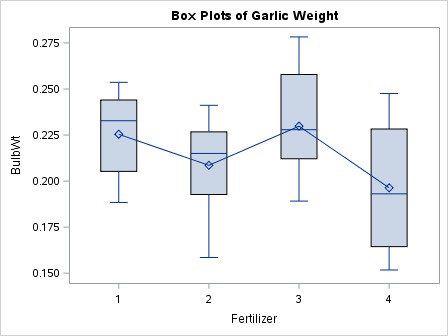

In [41]:
proc print data=statdata.mggarlic (obs=10);
   title "Partial Listing of Garlic Data";
run;

proc means data=statdata.mggarlic printalltypes maxdec=3;
    var BulbWt;
    class Fertilizer;
    title "Descriptive Statistics of Garlic Weight";
run;

ods graphics on / width=700;
proc sgplot data=statdata.mggarlic;
    vbox BulbWt / category=Fertilizer connect= mean datalabel=BedID;
    format BedID 5.;
    title "Box Plots of Garlic Weight";
run;
title;


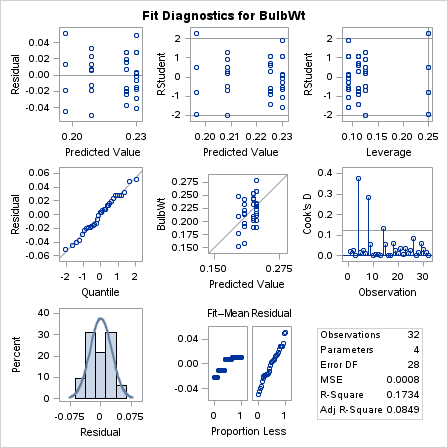

In [42]:
ods graphics on / width=700;

proc glm data=statdata.mggarlic plots(only)=diagnostics ;
   class Fertilizer;
   model BulbWt=Fertilizer;  /****/
   means Fertilizer / hovtest;
   title "Testing for Equality of Means with PROC GLM";
run;
quit;
title;


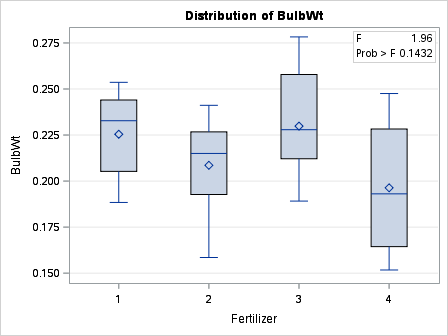

In [43]:
proc anova data=statdata.mggarlic;
    class Fertilizer;
    model BulbWt=Fertilizer;
run;

##### Interpretation of results

You want to see a random scatter of residuals above and below 0 for 
the four fertilizer groups. The plot looks good. 

You use Levene's Test for Homogeneity to formally test the equal variance
assumption. Because the p-value of 0.4173 is greater than 0.05, you fail to
reject the null and conclude that the variances are equal. This is good. 
You verified the equal variance assumption.

Because the residuals follow the diagonal reference line fairly closely,
you can say that they are approximately normal. 

The mean square error is $0.00078$, which is an estimate of the population variance. SAS 
calculates MSE by dividing the error sum of squares by the error Degrees of 
Freedom ($0.00457996/3$), which gives you the average sum of squares for the error. SAS calculates 
the F-statistic by dividing the MSM by the MSE ($0.00078/0.00152665$). The F statistic is 1.96. Because 
the corresponding p-value of $0.1432$ is greater than 0.05, you can conclude that
there is not a statistically significant difference between the mean bulb weights
for the four fertilizers.

**It's important for you to realize that the one-way ANOVA is an omnibus test 
statistic and cannot tell you which specific groups are significantly different 
from each other, *only that at least two groups are different*. To determine which 
specific groups differ from each other, you need to use a post-hoc test. **

All in all, the PROC GLM output supports your conclusion that there's not a 
statistically significant difference between the mean bulb weights for the four 
fertilizers. (F-test);

### Levene's test

The HOVTEST=BARTLETT option specifies Bartlett’s test (Bartlett; 1937), a modification of the normal-theory likelihood ratio test.

The HOVTEST=BF option specifies Brown and Forsythe’s variation of Levene’s test (Brown and Forsythe; 1974).

The HOVTEST=LEVENE option specifies Levene’s test (Levene; 1960), which is widely considered to be the standard homogeneity of variance test. 

In statistics, **Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups.** Some common statistical procedures assume that variances of the populations from which different samples are drawn are equal. Levene's test assesses this assumption. It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances. Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population.

The test statistic, $W$, is defined as follows:

$${\displaystyle W={\frac {(N-k)}{(k-1)}}{\frac {\sum _{i=1}^{k}N_{i}(Z_{i\cdot }-Z_{\cdot \cdot })^{2}}{\sum _{i=1}^{k}\sum _{j=1}^{N_{i}}(Z_{ij}-Z_{i\cdot })^{2}}},}$$

where

 $k$ is the number of different groups to which the sampled cases belong,
 
 $N_{i}$ is the number of cases in the $ith$ group,
 
 $N$ is the total number of cases in all groups,
  
 $Y_{{ij}}$ is the value of the measured variable for the $jth$ case from the $ith$ group,

${\displaystyle Z_{ij}={\begin{cases}|Y_{ij}-{\bar {Y}}_{i\cdot }|,&{\bar {Y}}_{i\cdot }{\text{ is a mean of the }}i{\text{-th group}},\\|Y_{ij}-{\tilde {Y}}_{i\cdot }|,&{\tilde {Y}}_{i\cdot }{\text{ is a median of the }}i{\text{-th group}}.\end{cases}}}$

#### ANOVA with Data from a Randomized Block Design
 
 Along with the three original ANOVA assumptions of independent observations, normally 
 distributed errors, and equal variances across treatments, you make two more assumptions
 when you include a blocking factor in the model. **First, you assume that the treatments 
 are randomly assigned within each block.** In the T-cell count example, this means that you 
 assume the three medications are randomly assigned to each of the three age groups. 
 Next, you **assume that the effects of the treatment factor are constant across the levels 
 of the blocking factor, meaning that the effects of the treatment factor don't depend on 
 the block they are in.** When the effects of the treatment factor are not constant across 
 the levels of another variable, it's called *interaction*. But when you use a randomized 
 block design, you assume that the **effects are the same within each block**. In other words, 
 you assume that there are **no interactions** with the blocking variable
 
 The farmers divide the farm into eight sectors, each of which has four beds, and in each of
 the four beds, they randomly assign each of the four fertilizers. An experimental design 
 like this is often referred to as a randomized block design. As you can see in this ANOVA 
 model, Sector is the blocking variable.

Obs,Sector,Position,Fertilizer,BulbWt,Cloves,BedId
1,1,1,3,0.25881,11.6322,22961
2,1,2,4,0.20746,12.5837,23884
3,1,3,1,0.27453,12.0597,19642
4,1,4,2,0.24467,12.1001,20384
5,2,1,3,0.21454,11.5863,20303
6,2,2,4,0.16953,12.7132,21004
7,2,3,1,0.22504,12.0470,16117
8,2,4,2,0.16809,11.9071,19686
9,3,1,4,0.21720,12.3655,26527
10,3,2,3,0.22551,11.6864,23574

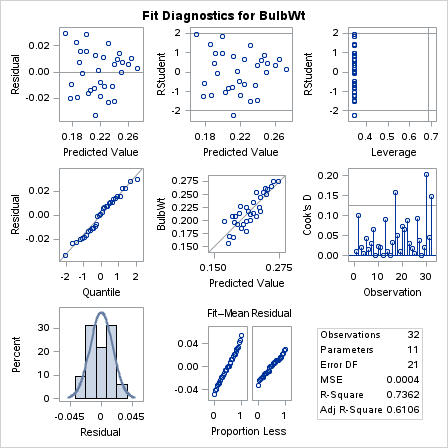

In [44]:
proc print data=statdata.mggarlic_block (obs=10);
run;

proc glm data=statdata.mggarlic_block plots(only)=diagnostics;
     class Fertilizer Sector;
     model BulbWt=Fertilizer Sector;
     title "ANOVA for Randomized Block Design";
run;
quit;
title;



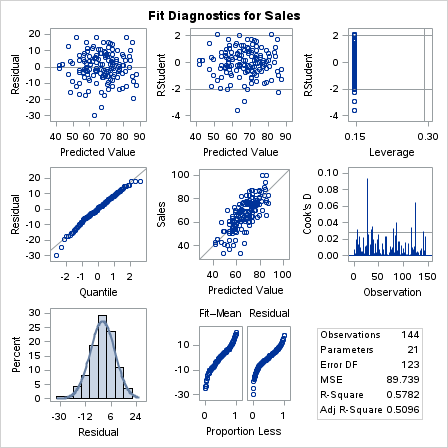

In [45]:
proc glm data=statdata.ads1 plots(only)=diagnostics;
   class Ad Area;
   model Sales=Ad Area;
   title 'ANOVA for Randomized Block Design';
run;
quit;
title;

### ANOVA Post Hoc Tests

A pairwise comparison examines the difference between two treatment means. If your ANOVA results suggest that you reject the null hypothesis that the means are equal across groups, you can conduct multiple pairwise comparisons in a post hoc analysis to learn which means differ.

The chance that you make a Type I error increases each time you conduct a statistical test. The comparisonwise error rate, or CER, is the probability of a Type I error on a single pairwise test. The experimentwise error rate, or EER, is the probability of making at least one Type I error when performing all of the pairwise comparisons. The EER increases as the number of pairwise comparisons increases. 

With a statistically conservative multiple comparison method, such as the Tukey or Dunnett method, you control for the EER, so there's a tendency to find fewer significant differences than might otherwise be found. When you make no adjustments for multiple comparisons, you are likely to find more significant differences than might otherwise be found. If only the comparisonwise error rate is controlled, the overall risk of a Type I error across all the comparisons is increased (and therefore the risk of Type II error is decreased), so the test might find more significant differences than would otherwise be found.

The Tukey method compares all possible pairs of means, so it can only be used when you make pairwise comparisons (See [Tukey's range test](https://en.wikipedia.org/wiki/Tukey%27s_range_test))
Tukey's procedure is only applicable for pairwise comparisons.
It assumes independence of the observations being tested, as well as equal variation across observations (homoscedasticity).
The procedure calculates for each pair the studentized range statistic: ${\frac  {Y_{{A}}-Y_{{B}}}{SE}}$ where $ Y_{{A}}$ is the larger of the two means being compared, ${\displaystyle Y_{B}} Y_{{B}}$ is the smaller, and $SE$ is the standard error of the data in question.
Tukey's test is essentially a Student's t-test, except that it corrects for family-wise error-rate.

[Dunnett's method](https://en.wikipedia.org/wiki/Dunnett%27s_test) is a specialized multiple comparison test that enables you to compare a single control group to all other groups.


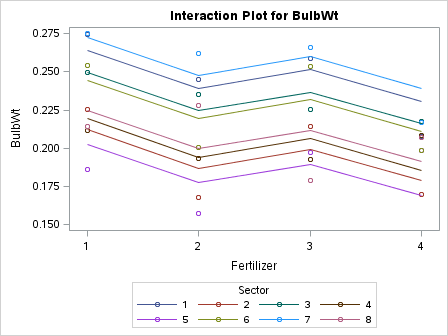
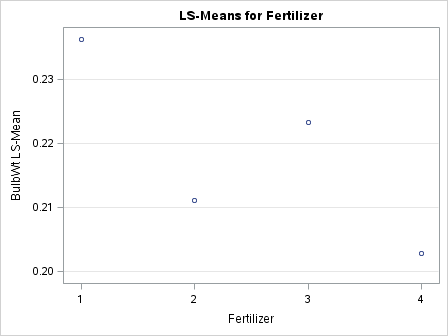
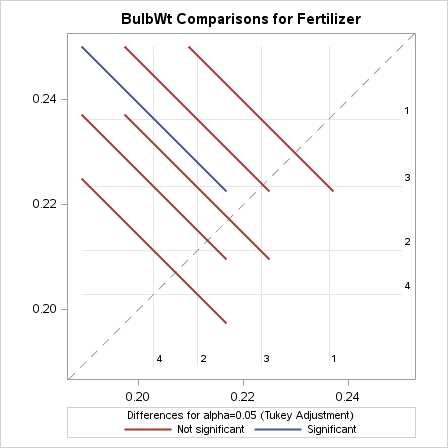
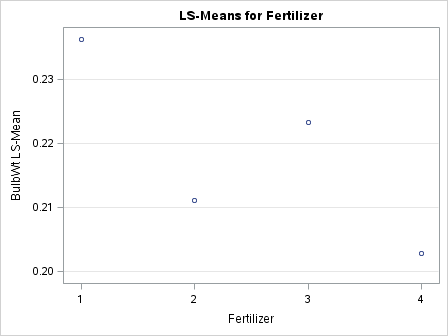
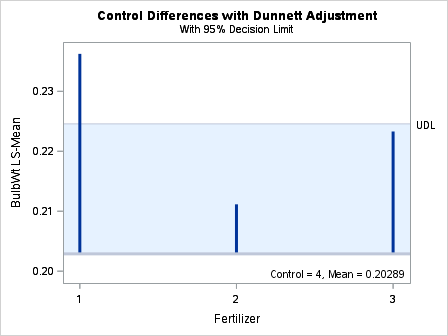
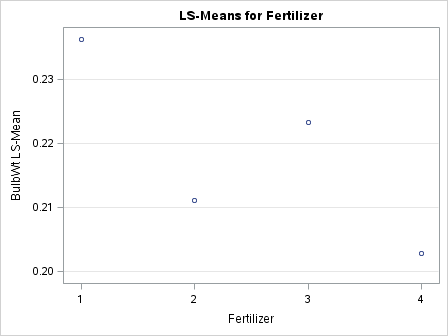
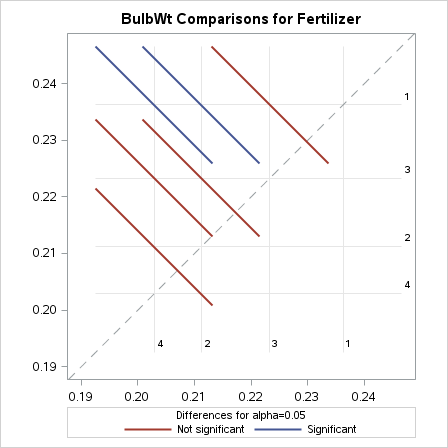

In [46]:
ods graphics on / width=700;
ods trace on;

proc glm data=statdata.mggarlic_block;
    class Fertilizer Sector;
    model BulbWt=Fertilizer Sector;             /*****/
    lsmeans Fertilizer / pdiff=all adjust=tukey;
    lsmeans Fertilizer / pdiff=controlu('4') adjust=dunnett;
    lsmeans Fertilizer / pdiff=all adjust=t;
    title "Garlic Data: Multiple Comparisons";
run;
quit;
title;

You can use the ODS TRACE statement in your program. When you add the ODS TRACE statement, SAS writes a trace record to the log that includes information about each output object, such as the path for each object and the label for each object. When you check the log, you can see a list of the ODS output objects and information about each one. Now that you know the names, you can decide what output to specify in the ODS SELECT statement. Let's turn tracing off, and then specify only the output we want to see. Now let's submit this program.

The only significant pairwise difference is between fertilizer 1 and fertilizer 4. The p-value of 0.0144 is less than your alpha, meaning that the bulb weights of these two fertilizers are significantly different from one another.

Because you performed one-sided, upper-tailed hypothesis tests of each of the organic fertilizers versus the chemical fertilizer, you only see the upper shaded region with the UDL in your plot. Remember that the bottom horizontal line is the least squares mean of your control group. The vertical line for fertilizer 1 is the only line that extends past the UDL. 

Finally, let's examine the output that corresponds to your third LSMEANS statement. These t-tests do not adjust for multiple comparisons, and are therefore more liberal than tests that do control for the EER. Take a moment to look at the p-values. You might notice that the p-values in this table are smaller than those in the Tukey table. In fact, which additional significant pairwise difference does this method show? It shows that fertilizer 1 is significantly different from fertilizer 2 with a p-value of 0.0195. This is in addition to fertilizers 1 and 4 being statistically different with a p-value of 0.0029. Notice also that the comparison between fertilizers 3 and 4 is nearly significant. So with this test, there's a tendency to find more significant pairwise differences than might actually exist. 

Lastly, let's take a look at the diffogram. Again, this reinforces what you know about fertilizers 1 and 4 and fertilizers 1 and 2. Using these multiple comparison techniques gives you options. If you feel strongly about controlling the EER, you shouldn't use the pairwise t-test results and should instead use the Tukey or Dunnett results. You knew before you performed these multiple comparison techniques that fertilizer 1 produced the garlic with the heaviest overall mean bulb weight, so that would be your first choice if you are not considering other factors like cost or availability. But what if fertilizer 1 is very expensive or hard to obtain? With these multiple comparison techniques, you now know which fertilizers are not statistically different from fertilizer 1, so the Montana Gourmet Garlic farmers have options for the fertilizer to use that will produce equally heavy garlic bulbs.

### Two-Way ANOVA with Interactions

When you have two categorical predictor variables and a continuous response variable, you can analyze your data using two-way ANOVA. With two-way ANOVA, you can examine the effects of the two predictor variables concurrently. You can also determine whether they interact with respect to their effect on the response variable. An interaction means that the effects on one variable depend on the value of another variable. If there is no interaction, you can interpret the test for the individual factor effects to determine their significance. If an interaction exists between any factors, the test for the individual factor effects might be misleading due to the masking of these effects by the interaction.

You can include interactions and more than one predictor variable in the ANOVA model.

You can graphically explore the relationship between the response variable and the effect of the interaction between the two predictor variables using PROC SGPLOT.

You can use PROC GLM to determine whether the effects of the predictor variables and the interaction between them are statistically significant.

When running PROC GLM, you can add a STORE statement to save your analysis results. By using the STORE statement, you can run postprocessing analyses on the stored results, even if you no longer have access to the original data set. The STORE statement requests that the procedure save the context and results of the statistical analysis into an item store. To perform post-fitting statistical analyses and plotting for the contents of the store item, you use the PLM procedure.

In [47]:
proc format;
   value dosef
   1="Placebo"
   2="100 mg"
   3="200mg"
   4="500mg";
run;

proc means data=statdata.drug
           mean var std printalltypes;
   class Disease DrugDose;
   var BloodP;
   output out=means mean=BloodP_Mean;
   format DrugDose dosef.;
   title "Selected Descriptive Statistics for Drug Data Set";
run;
title;

The Means data set contains the variable _TYPE_, with values ranging from 0 to 3 to 
represent the four tables this PROC MEANS program generates. Type 0 gives you the 
mean blood pressure change of all observations, regardless of disease type or drug dose.
Type 1 gives you the mean blood pressure for each drug dose, regardless of disease type. 
Type 2 gives you the mean blood pressure for each disease type, regardless of drug dose.
And Type 3 gives you the mean blood pressure for each disease type and drug dose combination.


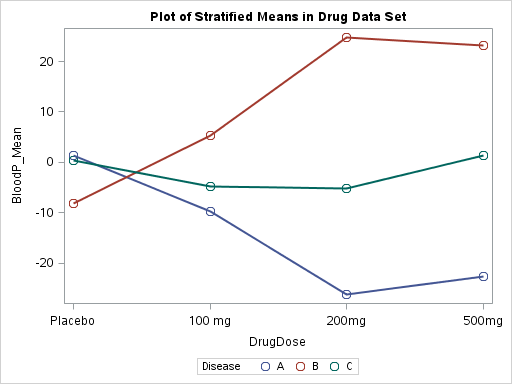
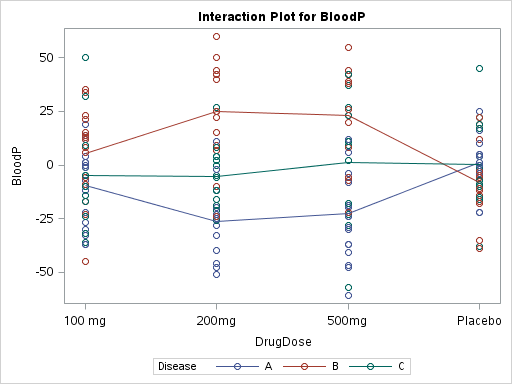

In [48]:
ods graphics on / width=800;

proc sgplot data=means;
   where _TYPE_=3;     
   scatter x=DrugDose y=BloodP_Mean / 
           group=Disease markerattrs=(size=10);
   series x=DrugDose y=BloodP_Mean / group=Disease        
          lineattrs=(thickness=2);
   xaxis integer;
   format DrugDose dosef.;  
   title "Plot of Stratified Means in Drug Data Set";
run;
title;

ods graphics on / width=800;

proc glm data=statdata.drug;
   class DrugDose Disease;
   model Bloodp=DrugDose Disease DrugDose*Disease / ss3;
   format DrugDose dosef.;  
   title "Analyze the Effects of DrugDose and Disease";
   title2 "Including Interaction";
run;
quit;
title;


The p-value for the overall model is very small, so what does this tell you? You can reject the null hypothesis and conclude that at least one of the effects in the model is significant, in other words, there is at least one difference among the 12 group means, one for each drug dose and disease combination. Which factors explain this difference? You'll see in just a few moments. 

The R square is 0.3479, so approximately 35% of the variation in blood pressure change can be explained by the model. The average blood pressure change of all the observations is –2.294, which is exactly what the PROC MEANS output showed. 

The next tables show the breakdown of the main effects and interaction term in the model. Look at the Type I and Type III Sums of Squares values. Do you know why their values are not exactly the same? You don't have a balanced design in this experiment. In other words, you have a different number of observations in each drug dose and disease combination group. In most situations, you will want to use the Type III SS. The Type I, or sequential SS, are the sums of squares you obtain from fitting the effects in the order you specify in the model. **The Type III, or marginal SS, are the sums of squares you obtain from fitting each effect after all the other terms in the model, that is, the sums of squares for each effect corrected for the other terms in the model.** Type III SS does not depend upon the order you specify effects in the model.  (Use the SS3 option on the MODEL statement, this portion of the output shows the results for Type III SS only.)

You want to look at the interaction term  first. If it's significant, the main effects don't tell you the whole story. The p-value for DrugDose*Disease is 0.0001. Presuming an alpha of 0.05, you reject the null hypothesis. You have sufficient evidence to conclude that there is an interaction between the two factors, meaning that the effect of the level of drug dose on blood pressure changes for the different disease types. You don't need to worry all that much about the significance of the main effects at this point for two reasons: 1) Because the interaction term is significant, you know that the effect of the drug level changes for the different disease types. 2) Because the interaction term is significant, you want to include the main effects in the model, whether they are significant or not, to preserve model hierarchy.   

Let's finally take a look at the interaction plot for blood pressure. SAS produces this plot by default when you have an interaction term in the model. This plot looks similar to the one you produced with PROC SGPLOT, except that this one plots each of the blood pressure change measurements, as well as the means for each drug dose and disease type combination. Well, you might be thinking, "Okay. I know the interaction is significant. What I really want to know is the effect of drug dose at each particular level of disease." You have to add the LSMEANS statement to your program to find the answer.

### The PLM Procedure

The PLM procedure performs post-fitting statistical analyses and plotting for the contents of a SAS item store that were previously created with the STORE statement in some other SAS/STAT procedure. 

The statements that are available in the PLM procedure are designed to reveal the contents of the source item store via the Output Delivery System (ODS) and to perform post-fitting tasks.

The use of item stores and PROC PLM enables you to separate common post-processing tasks, such as testing for treatment differences and predicting new observations under a fitted model, from the process of model building and fitting. A numerically expensive model fitting technique can be applied once to produce a source item store. The PLM procedure can then be called multiple times, and the results of the fitted model are analyzed without incurring the model fitting expenditure again.

Selected PROC PLM option:

* RESTORE	specifies the source item store for processing.
* Selected PROC PLM procedure statements:
* EFFECTPLOT produces a display of the fitted model and provides options for changing and enhancing the displays.
* LSMEANS computes and compares least squares means (LS-means) of fixed effects.
* LSMESTIMATE	provides custom hypothesis tests among least squares means.
* SHOW uses the Output Delivery System to display contents of the item store. This statement is useful for verifying   that the contents of the item store apply to the analysis and for generating ODS tables.
* SLICE provides a general mechanism for performing a partitioned analysis of the LS-means for an interaction. This analysis is also known as an analysis of simple effects. The SLICE statement uses the same options as the LSMEANS statement.
* WHERE is used in the PLM procedure when the item store contains BY-variable information and you want to apply the PROC PLM statements to only a subset of the BY groups.


    PROC PLM RESTORE=item-store-specification<options>;
        EFFECTPLOT <plot-type <(plot-definition options)>> 
              </ options>;
        LSMEANS <model-effects > </ options>;
        LSMESTIMATE model-effect <'label'> values 
          <divisor=n><,...<'label'> values
          <divisor=n>> </ options>;
    SHOW options;
    SLICE model-effect </ options>;
    WHERE expression ;
    RUN;

### Saving Analysis Results with the STORE Statement

When running PROC GLM, you can add a STORE statement to save your analysis results. By using the STORE statement, you can run postprocessing analyses on the stored results, even if you no longer have access to the original data set.

The STORE statement requests that the procedure save the context and results of the statistical analysis into an item store. An item store is a binary file format that cannot be modified. You can process the contents of an item store with the PLM procedure.

For example, if you need to perform a time-consuming analysis, you can store the results by using the STORE statement. 

At a later time, you can use PROC PLM to perform specific statistical analysis tasks based on the saved results of the previous analysis without having to fit the model again. This can be a great time saver!

Here is the syntax of the STORE statement. Following the keyword STORE and OUT= you specify the item store name and an optional label.

You can use the STORE statement in a number of SAS/STAT procedures. For more information about the STORE statement, click the Information button.



In [49]:
proc contents data = statdata.ameshousing3;
run;


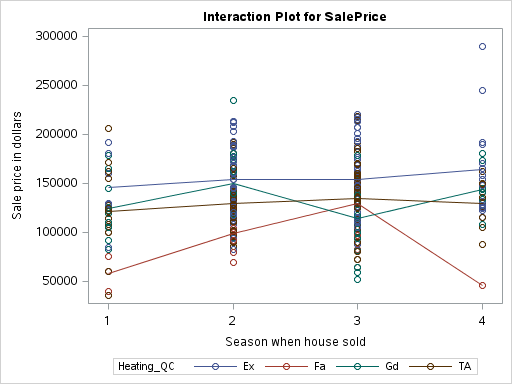

In [50]:
proc glm data=statdata.ameshousing3 
         order=internal 
         plots(only)=intplot;
   class Season_Sold Heating_QC;
   model SalePrice=Heating_QC Season_Sold Heating_QC*Season_Sold / ss3;
   lsmeans Heating_QC*Season_Sold / diff slice=Heating_QC;
   format Season_Sold ;
   store out=interact;
   title "Model with Heating Quality and Season as Interacting "
         "Predictors";
run;


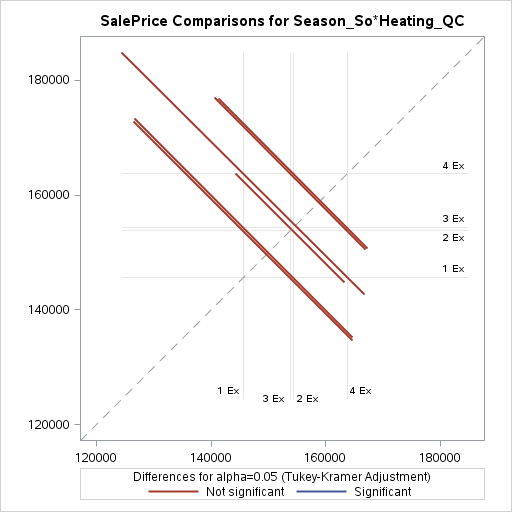
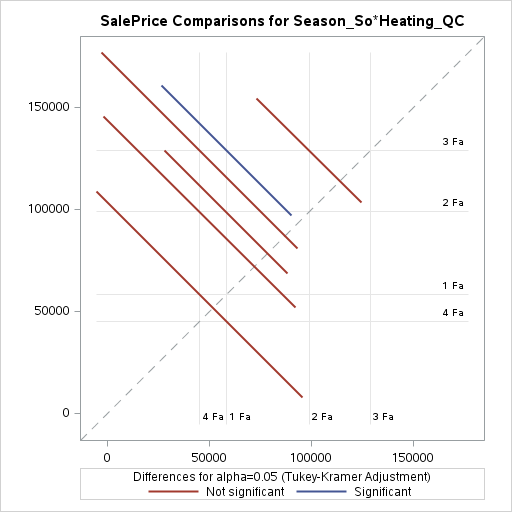
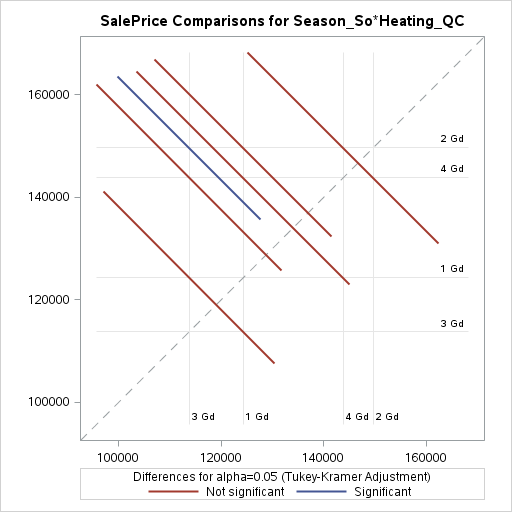
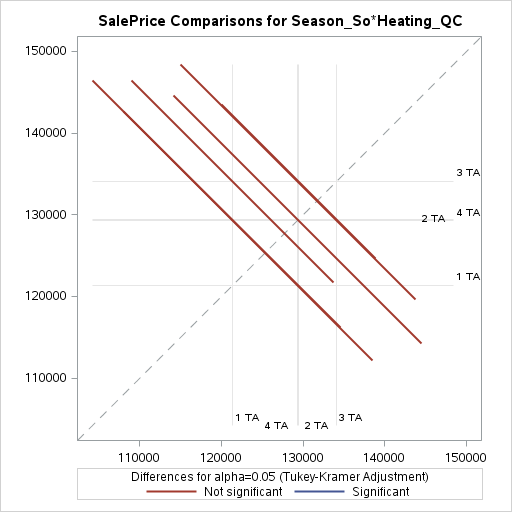
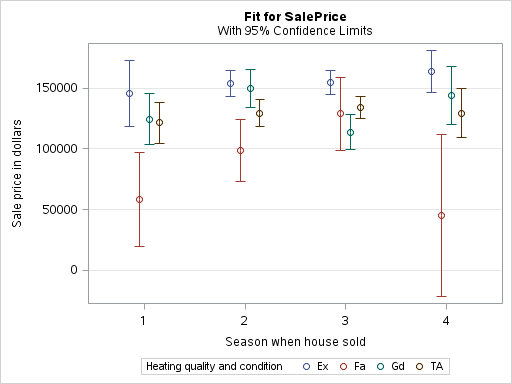

In [51]:
proc plm restore=interact plots=all;
   slice Heating_QC*Season_Sold / sliceby=Heating_QC adjust=tukey;
   effectplot interaction(sliceby=Heating_QC) / clm;
run; 

The option order=internal tells SAS to use the order of the variable values stored internally, rather than the order of the formatted values. The internal values for Season_Sold are 1 (formatted as Winter), 2 (formatted as Spring), 3 (for Summer), and 4 (for Fall). So, including order=internal tells SAS to display the seasons in the order Winter, Spring, Summer, and Fall, rather than in alphabetical order. 

We specify plots(only)=intplot to request an interaction plot. You can request an interaction plot even if there isn’t an interaction in the model. In this case, there is an interaction, so we’ll be able to visualize the interaction in the plot. Because Season_Sold and Heating_QC are categorical variables, we need to include them in a CLASS statement.

In the MODEL statement, we specify the response variable SalePrice, equals, the main effects Heating_QC and Season_Sold, and then interaction effect. The interaction effect is represented as the two main effects separated by an asterisk. Here’s another way to represent the effects. Instead of listing the interaction effect, we could simply place a vertical bar between the main effects.

Recall that the LSMEANS option computes and compares least squares means of fixed effects. This LSMEANS statement specifies the interaction term Heating_QC by Season_Sold. By specifying slice=Heating_QC, we tell SAS to to slice the interaction effect by the different levels of Heating_QC. 

This means that each slice will have one Heating_QC level and will show the Season_Sold effect across that slice. We'll format Season_Sold with a FORMAT statement. The statement store out=interact saves the analysis results as a SAS item store named interact in the Work library.

We want to produce more tables on Season_Sold by different levels of Heating_QC, so we add the SLICE statement slice Heating_QC by Season_Sold, sliceby=Heating_QC. Notice that the syntax sliceby= in the SLICE statement is different from slice= in the LSMEANS statement. 

We include adjust=tukey in order to get the Tukey adjustment for multiple comparison tests.

By specifying plots=all, the output will include an effect plot. However, by adding an EFFECTPLOT statement, we can specify more options. We specify the interaction sliceby=Heating_QC, and we specify clm, which gives us confidence limits for the means.

In [52]:
*variables

Region
Advertising
Gender
Book_Sales
Music_Sales
Electronics_Sales
Total_Sales
;

proc format;
   value yesno 1 = 'Yes'
               0 = 'No';
data Store;
   length Region $ 5;
   call streaminit(57676);
   do Transaction = 1 to 200;
      R = ceil(rand('uniform')*10);
      select(R);
         when(1) Region = 'East';
         when(2) Region = 'West';
         when(3) Region = 'North';
         when(4) Region = 'South';
         otherwise;
      end;
      Advertising = rand('bernouli',.6);
      if rand('uniform') lt .6 then Gender = 'Female';
         else Gender = 'Male';
      Book_Sales = abs(round(rand('normal',250,50) + 30*(Gender = 'Female')
                    + 30*Advertising,10)) ;
      Music_Sales = abs(round(rand('uniform')*40 + rand('normal',50,5)
         + 30*(Region = 'East' and Gender = 'Male')
         - 20*(Region = 'West' and Gender = 'Female'),5) + 10*Advertising);
      Electronics_Sales = abs(round(rand('normal',300,60) + 70*(Gender = 'Male')
       + 55*Advertising + 50*(Region = 'East') - 20*(Region = 'South') 
       + 75*(Region = 'West'),10));
      Total_Sales = sum(Book_Sales,Music_Sales,Electronics_Sales);
   output;
   end;
   drop R;
   format Book_Sales Music_Sales Electronics_Sales Total_Sales dollar9.
          Advertising yesno.;
run;
 
/*title "Listing of Store";*/
/*proc print data=store heading=h;*/
/*run;*/

/*proc univariate data=store;*/
/*   var Book_Sales -- Total_Sales;*/
/*   histogram;*/
/*run;*/
/**/
/*title "Scatter Matrix for Store Variables";*/
/*proc sgscatter data=store;*/
/*   matrix Book_Sales -- Total_Sales / group = Gender;*/
/*run;*/
/**/
/*proc sgplot data=store;*/
/*   scatter x=Book_Sales y=Total_Sales / group=Gender;*/
/*run;*/

proc rank data=store out=median_sales groups=2;
   var Total_Sales;
   ranks Sales_Group;
run;

proc format;
   value sales 0 = 'Low'
               1 = 'High';
run;

/*proc logistic data=median_sales order=formatted;*/
/*   class Gender(param=ref ref='Male');*/
/*   model Sales_Group = Gender;*/
/*   format Sales_Group sales.;*/
/*quit;*/
/**/
/*proc logistic data=median_sales order=formatted;*/
/*   class Gender(param=ref ref='Male')*/
/*         Advertising (param=ref ref='No');*/
/*   model Sales_Group = Gender Advertising;*/
/*   format Sales_Group sales.;*/
/*quit;*/

*Create test data set;
libname example 'c:\books\statistics by example';
data example.Blood_Pressure;
   call streaminit(37373);
   do Drug = 'Placebo','Drug A','Drug B';
      do i = 1 to 20;
         Subj + 1;
         if mod(Subj,2) then Gender = 'M';
         else Gender = 'F';
         SBP = rand('normal',130,10) +
               7*(Drug eq 'Placebo') - 6*(Drug eq 'Drug B');
         SBP = round(SBP,2);
         DBP = rand('normal',80,5) +
               3*(Drug eq 'Placebo') - 2*(Drug eq 'Drug B');
         DBP = round(DBP,2);
         if Subj in (5,15,25,55) then call missing(SBP, DBP);
         if Subj in (4,18) then call missing(Gender);
         output;
      end;
   end;
   drop i;
run;

/*title "Listing of the first 25 observations from Blood_Pressure";*/
/*proc print data=example.Blood_Pressure(obs=25) noobs;*/
/*   var Subj Drug SBP DBP;*/
/*run;*/

data exercise;
   call streaminit(7657657);
   do Subj = 1 to 50;
      Age = round(rand('normal',50,15));
      Pushups = abs(int(rand('normal',40,10) - .30*age));
      Rest_Pulse = round(rand('normal',50,8) + .35*age);
      Max_Pulse = round(rest_pulse + rand('normal',50,5) - .05*age);
      Run_Pulse = round(max_pulse - rand('normal',3,3));
      output;
   end;
run;

*Data set for a paired t-test example;
data reading;
   input Subj Before After @@;
datalines;
1 100 110  2 120 121  3 130 140  4 90 110  5 85 92
6 133 137  7 210 209  8 155 179
;

/*title "Listing of Data Set READING";*/
/*proc print data=reading noobs;*/
/*run;*/

*Data set that violates assumptions for a t-test;
data salary;
   call streaminit(57575);
   do Subj = 1 to 50;
      do Gender = 'M','F';
         Income = round(20000*rand('exponential') + rand('uniform')*7000*(Gender = 'M'));
         output;
      end;
   end;
run;
/*proc univariate data=salary;*/
/*   class Gender;*/
/*   id Subj;*/
/*   var Income;*/
/*   histogram Income;*/
/*run;*/

*Data set risk for logistic regression example;
proc format;
   value yesno 1 = 'Yes'
               0 = 'No';
run;

data Risk;
   call streaminit(13579);
   length Age_Group $ 7;
   do i = 1 to 250;
      do Gender = 'F','M';
         Age = round(rand('uniform')*30 + 50);
         if missing(Age) then Age_Group = ' ';
         else if Age lt 60 then Age_Group = '1:< 60';
         else if Age le 70 then Age_Group = '2:60-70';
         else Age_Group = '3:71+';
         Chol = rand('normal',200,30) + rand('uniform')*8*(Gender='M');
         Chol = round(Chol);
         Score = .3*chol + age + 8*(Gender eq 'M');
         Heart_Attack = (Score gt 130)*(rand('uniform') lt .2);
         output;
       end;
   end;
   keep Gender Age Age_Group chol Heart_Attack;
   format Heart_Attack yesno.;
run;

/*title "Listing of first 100 observations from RISK";*/
/*proc print data=risk(obs=100);*/
/*run;*/

